# Importando Bibliotecas

In [90]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from pandas import DataFrame as df
from scipy.stats import zscore
import seaborn as sns
import re
import os

from ydata_profiling import ProfileReport
import sweetviz as sv

# Carregando e inspecionando dados

In [50]:
data = pd.read_csv("./data/card_transdata.csv", na_values=[' ', '_', '_______'], low_memory=False)

# Mostrando as primeiras 5 linhas do Dataframe Original

In [51]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# Mostrando o formato do Dataframe Original


In [52]:
# número de colunas
print(f'columns: {data.shape[1]}')

# número de linhas
print(f'rows: {data.shape[0]}')

columns: 8
rows: 1000000


# Obtendo informações sobre cada variável do dataframe original

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


# Remoção dos valores FRAUDES != True

In [54]:
# Remover todas as linhas onde 'fraud' é igual a 0
dataWithoutFrauds = data[data['fraud'] != 0]

# Redefinir o índice do DataFrame
dataWithoutFrauds.reset_index(drop=True, inplace=True)

# Removendo a coluna 'fraud''

In [55]:
dataWithoutFrauds = dataWithoutFrauds.drop('fraud', axis=1)

# Apresentando o Novo Dataframe SOMENTE com FRAUDES == True

In [56]:
dataWithoutFrauds

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0
1,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0
2,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0
3,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0
4,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
87398,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0
87399,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0
87400,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0
87401,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0


# Mostra as primeiras 5 linhas do Novo Dataframe SOMENTE com FRAUDES == True

In [57]:
dataWithoutFrauds.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0
1,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0
2,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0
3,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0
4,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0


# Obtendo informações sobre cada variável do Novo Dataframe SOMENTE com FRAUDES == True

In [58]:
dataWithoutFrauds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87403 entries, 0 to 87402
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   distance_from_home              87403 non-null  float64
 1   distance_from_last_transaction  87403 non-null  float64
 2   ratio_to_median_purchase_price  87403 non-null  float64
 3   repeat_retailer                 87403 non-null  float64
 4   used_chip                       87403 non-null  float64
 5   used_pin_number                 87403 non-null  float64
 6   online_order                    87403 non-null  float64
dtypes: float64(7)
memory usage: 4.7 MB


# Mostrando o formato do Novo Dataframe SOMENTE com FRAUDES == True

In [59]:
# número de colunas
print(f'columns: {dataWithoutFrauds.shape[1]}')

# número de linhas
print(f'rows: {dataWithoutFrauds.shape[0]}')

columns: 7
rows: 87403


# Limpeza de dados

### 1. Valores ausentes

In [60]:
# Verifique a soma dos valores ausentes para cada coluna
dataWithoutFrauds.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
dtype: int64

### 2. Valores duplicados

In [61]:
# Verifique a soma das linhas duplicadas
print(f'duplicate rows: {dataWithoutFrauds.duplicated().sum()}')

duplicate rows: 0


# Algumas informações estatísticas

In [62]:
# Criando uma tabela de estatísticas descritivas para dados
dataWithoutFrauds.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,87403.0,66.261876,134.391608,0.025847,4.585729,15.454219,101.110104,10632.723672
distance_from_last_transaction,87403.0,12.712185,47.997697,0.000407,0.328199,1.157631,4.598504,2160.499922
ratio_to_median_purchase_price,87403.0,6.006323,5.564320,0.011966,3.500270,5.071294,7.331222,266.689692
repeat_retailer,87403.0,0.880119,0.324825,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,87403.0,0.256399,0.436647,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,87403.0,0.003123,0.055801,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,87403.0,0.946318,0.225391,0.000000,1.000000,1.000000,1.000000,1.000000


# Análise Exploratória dos Dados (EDA)

### Distribuição de Compras em Lojas Repetidas

In [79]:
# Contagem de valores únicos na coluna 'repeat_retailer'
repeat_retailer_count = dataWithoutFrauds['repeat_retailer'].value_counts()
repeat_retailer_count

repeat_retailer
1.0    76925
0.0    10478
Name: count, dtype: int64

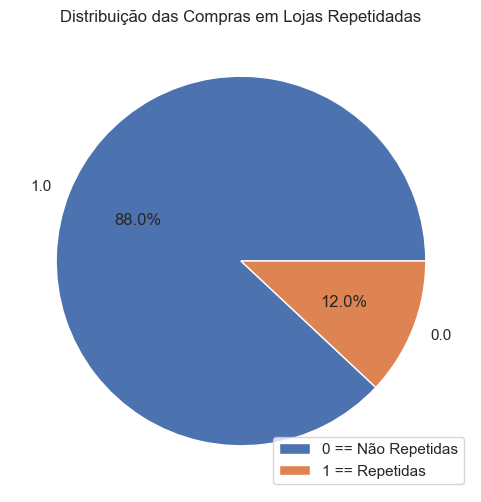

In [103]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotagem do gráfico de torta apenas para 'repeat_retailer' 
plt.figure(figsize=(6, 6))
plt.pie(repeat_retailer_count.values, labels=repeat_retailer_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras em Lojas Repetidadas')

# Adicionando legendas
legend_labels = ['0 == Não Repetidas', '1 == Repetidas']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso do Chip

In [80]:
# Contagem de valores únicos na coluna 'used_chip'
used_chip_count = dataWithoutFrauds['used_chip'].value_counts()
used_chip_count

used_chip
0.0    64993
1.0    22410
Name: count, dtype: int64

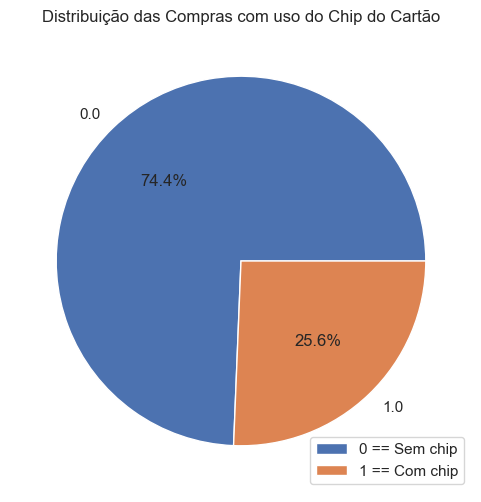

In [104]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotagem do gráfico de torta apenas para 'used_chip' 
plt.figure(figsize=(6, 6))
plt.pie(used_chip_count.values, labels=used_chip_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso do Chip do Cartão')

# Adicionando legendas
legend_labels = ['0 == Sem chip', '1 == Com chip']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras com Uso da Senha

In [31]:
# Contagem de valores únicos na coluna 'used_pin_number'
used_pin_number_count = dataWithoutFrauds['used_pin_number'].value_counts()
used_pin_number_count

used_pin_number
0.0    87130
1.0      273
Name: count, dtype: int64

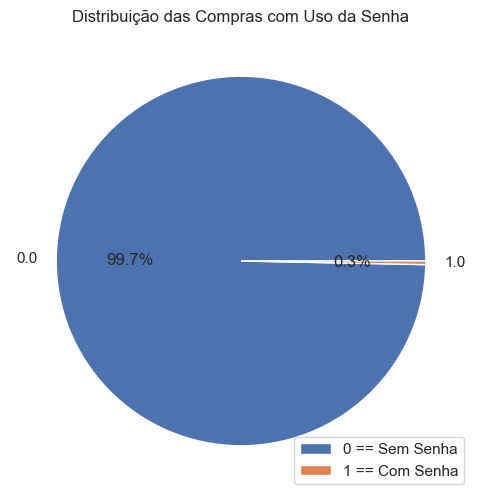

In [105]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotagem do gráfico de torta apenas para 'used_pin_number_count' 
plt.figure(figsize=(6, 6))
plt.pie(used_pin_number_count.values, labels=used_pin_number_count.index, autopct='%1.1f%%')
plt.title('Distribuição das Compras com Uso da Senha')

# Adicionando legendas
legend_labels = ['0 == Sem Senha', '1 == Com Senha']
plt.legend(legend_labels, loc='lower right')

plt.show()

### Distribuição de Compras Onlines

In [45]:
# Contagem de valores únicos na coluna 'online_order'
online_order_count = dataWithoutFrauds['online_order'].value_counts()
online_order_count

online_order
1.0    82711
0.0     4692
Name: count, dtype: int64

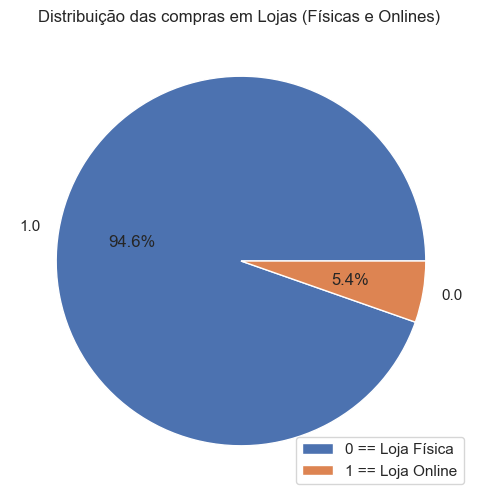

In [107]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotagem do gráfico de torta apenas para 'online_order_count' 
plt.figure(figsize=(6, 6))
plt.pie(online_order_count.values, labels=online_order_count.index, autopct='%1.1f%%')
plt.title('Distribuição das compras em Lojas (Físicas e Onlines) ')

# Adicionando legendas
legend_labels = ['0 == Loja Física ', '1 == Loja Online']
plt.legend(legend_labels, loc='lower right')

plt.show()

In [47]:
# Crie uma lista contendo recursos categóricos
cat_features = ['repeat_retailer', 'used_chip','used_pin_number', 'online_order']

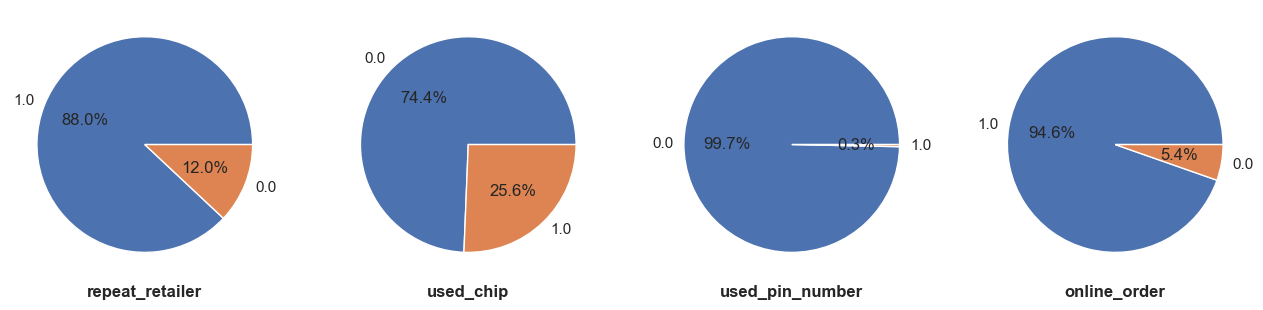

In [108]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Desenhando um gráfico de pizza para exibir a distribuição de cada coluna categórica
plt.figure(figsize = (16, 12))
for i, col in enumerate(cat_features):
    plt.subplot(1, 4, i+1)
    plt.pie(x = dataWithoutFrauds[col].value_counts().values, 
            labels = dataWithoutFrauds[col].value_counts().index, 
            autopct = '%1.1f%%')
    plt.xlabel(col, weight = 'bold')
plt.show()

### Recursos Numéricos

In [110]:
# Crie uma lista contendo recursos numéricos
num_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



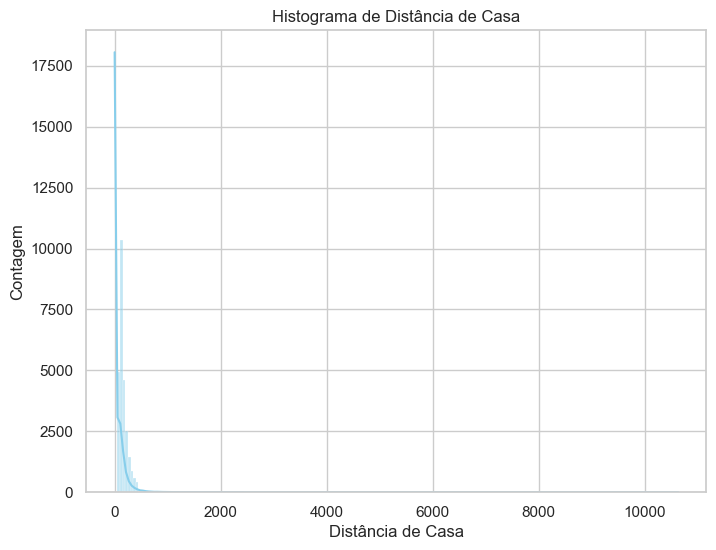

In [134]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotagem do histograma para 'distance_from_home'
plt.figure(figsize=(8, 6))
sns.histplot(data=dataWithoutFrauds, x='distance_from_home', bins=range(50, 500, 50), kde=True, color='skyblue')
plt.title('Histograma de Distância de Casa')
plt.xlabel('Distância de Casa')
plt.ylabel('Contagem')


plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



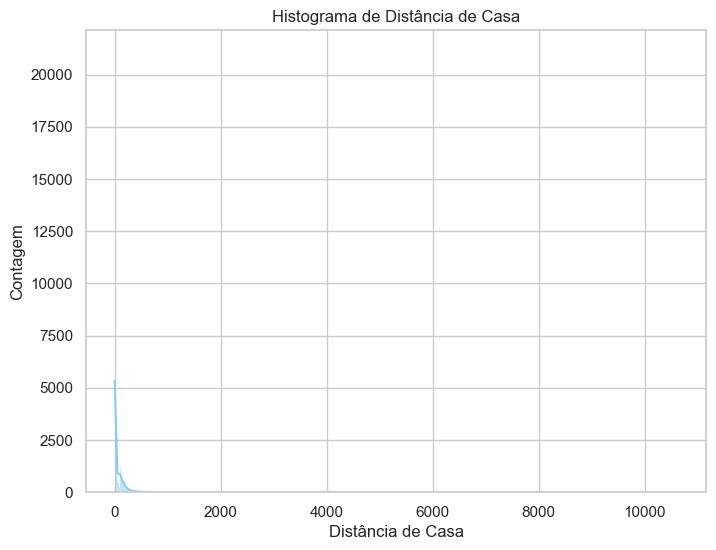

In [121]:
# Configurando o estilo do Seaborn
sns.set(style="whitegrid")

# Plotagem do histograma para 'distance_from_home'
plt.figure(figsize=(8, 6))
sns.histplot(data=dataWithoutFrauds, x='distance_from_home', kde=True, color='skyblue')
plt.title('Histograma de Distância de Casa')
plt.xlabel('Distância de Casa')
plt.ylabel('Contagem')
plt.show()

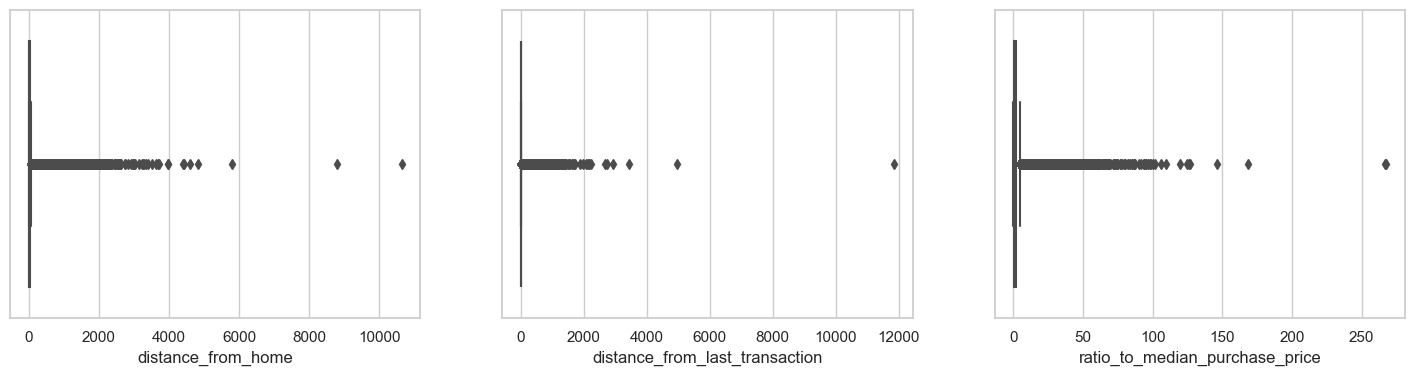

In [111]:
# Drawing a boxplot to display the distribution of each numerical column to detect the outliers
plt.figure(figsize = (18, 4))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data = data, x = col)
plt.show()